In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [199]:
# Import dataset
user = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/2.Translation_Test/user_table.csv")
test = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/2.Translation_Test/test_table.csv")

In [200]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [201]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [202]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [203]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [204]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [205]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [206]:
# Check any null values in the dateset
user.isnull().any()

user_id    False
sex        False
age        False
country    False
dtype: bool

In [207]:
# Check any null values in the dateset
# There are some null in "ads_channel". It means that the user didn't come via an ad.
test.isnull().any()

user_id             False
date                False
source              False
device              False
browser_language    False
ads_channel          True
browser             False
conversion          False
test                False
dtype: bool

In [208]:
# Check data types of each column
test.dtypes 

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [209]:
# Convert the dtype of 'date' column to datetime
test['date'] = pd.to_datetime(test['date'])

In [210]:
user.dtypes

user_id     int64
sex        object
age         int64
country    object
dtype: object

In [211]:
# Check uniqueness
# From the length of two tables, we can find that we have some user_id missing in the user table.
# When joining, we have to be careful to do not lose the user_ids in the test table, but not in the user table.
print('test ID:\t', len(test['user_id'].unique()), '\t', len(test['user_id'].unique()) == len(test))
print('user ID:\t', len(user['user_id'].unique()), '\t', len(user['user_id'].unique()) == len(user))

test ID:	 453321 	 True
user ID:	 452867 	 True


In [212]:
data = test.merge(user, how='left', on='user_id')

In [213]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [214]:
# Make sure it is true Spain converts much better than the rest of LatAm countries
groupby_country = data[data['test']==0][['conversion', 'country']].groupby('country').mean().reset_index().sort_values('conversion', ascending=False)
groupby_country

,country,conversion
14,Spain,0.079719
6,El Salvador,0.053554
10,Nicaragua,0.052647
4,Costa Rica,0.052256
3,Colombia,0.052089
8,Honduras,0.050906
7,Guatemala,0.050643
16,Venezuela,0.050344
13,Peru,0.049914
9,Mexico,0.049495


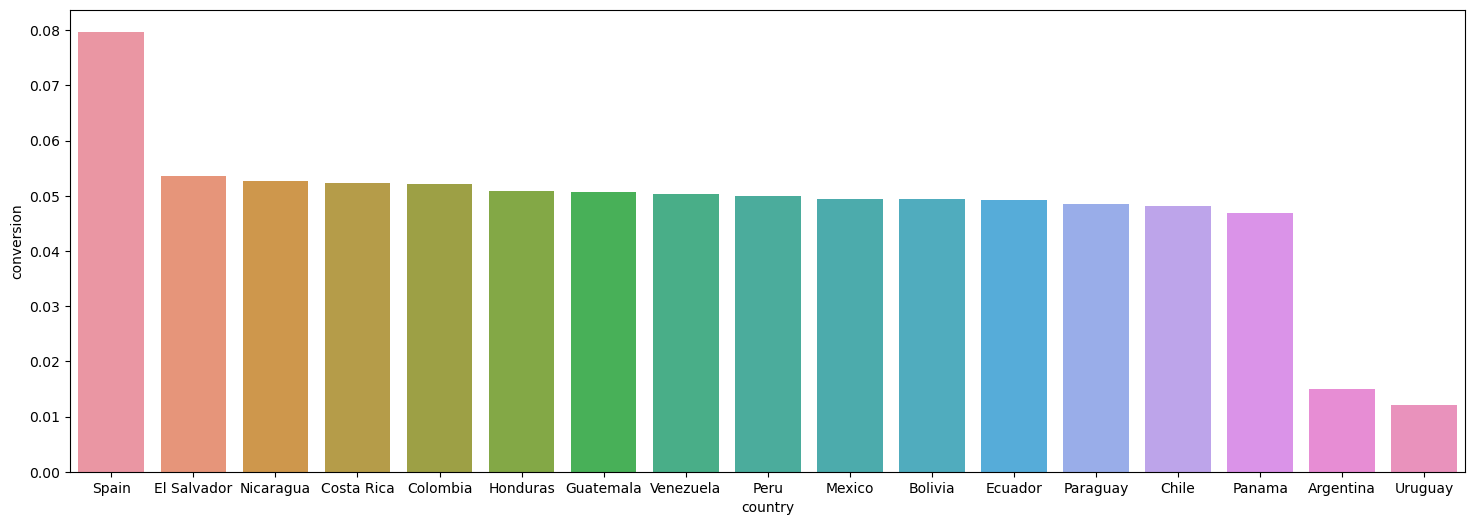

In [215]:
# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=groupby_country, ax=ax)
plt.show()

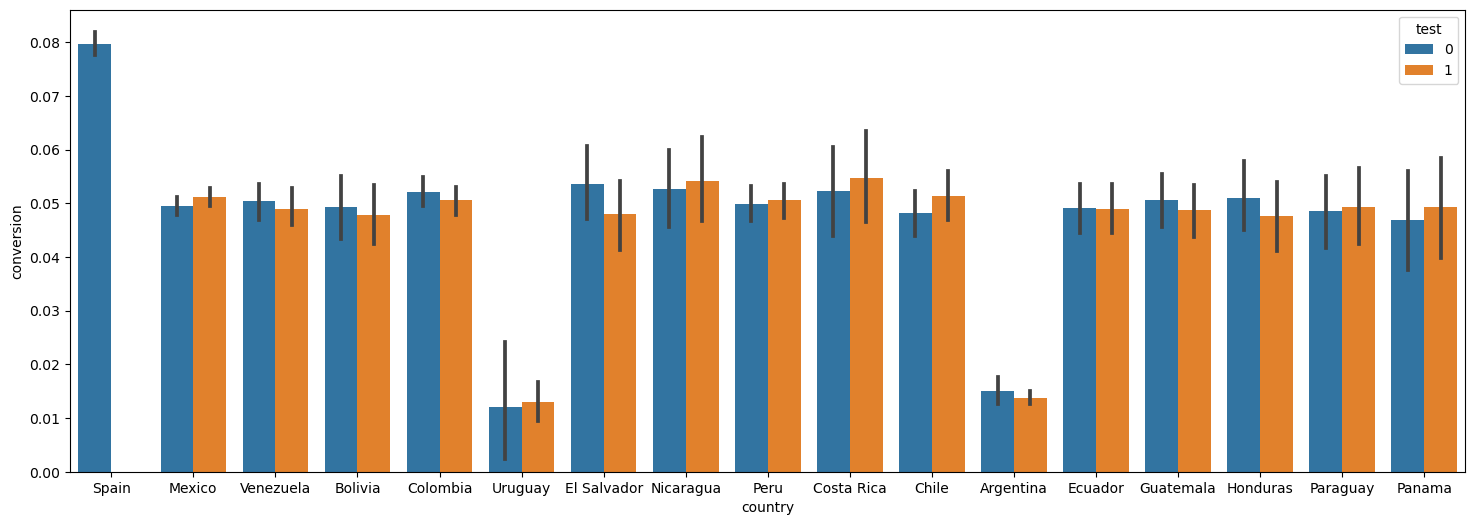

In [216]:
# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=data, ax=ax)
plt.show()

## Q1: Investigate if the test is actually negative.

In [217]:
#nothing changed in Spain, so do not need to keep those users
data = data[data['country'] != 'Spain']

In [218]:
control_group = data[(data['test']==0)]
test_group = data[(data['test']==1)]

In [219]:
# test/control split is ~50/50
print(len(test_group)/len(data))
print(len(control_group)/len(data))

0.5378879760122927
0.4621120239877073


In [220]:
data.groupby('test')['conversion'].mean().reset_index()

,test,conversion
0,0,0.048330
1,1,0.043425


It seems that the control group performed slightly better.

## Q2: Explain why that might be happening. Are the localized translations really worse?

##### Do a Welch two sample t-test to check if there is a statiscal difference in the conversion rate of two groups

In [221]:
import scipy as sc
sc.stats.ttest_ind(control_group['conversion'], test_group['conversion'], equal_var = False, axis = 0)

Ttest_indResult(statistic=7.3939374121344805, pvalue=1.4282994754055316e-13)

As the p value is less than alpha = .05, we can reject the null hypothesis. This implies, two groups have different conversion rate. The conversion rate of the control group is 4.83%, and the conversion rate of the test group 4.34%. That's a 10% drop, which would be dramatic if it were true.

Twyman's law: Any figure that looks interesting or different is usually wrong.

The most likely reason for weird A/B test results are:
* We didn’t collect enough data.
* Some bias has been introduced in the experiment so that test/control people are not really random.

In [222]:
time_series = data.groupby(['date','test'])[['conversion']].mean()
time_series

conversion
date       test            
2015-11-30 0       0.051378
           1       0.043886
2015-12-01 0       0.046287
           1       0.041387
2015-12-02 0       0.048550
           1       0.044234
2015-12-03 0       0.049284
           1       0.043884
2015-12-04 0       0.047043
           1       0.043491

In [223]:
time_series = time_series.unstack()['conversion'][1]/time_series.unstack()['conversion'][0]
time_series

date
2015-11-30    0.854179
2015-12-01    0.894141
2015-12-02    0.911090
2015-12-03    0.890439
2015-12-04    0.924486
dtype: float64

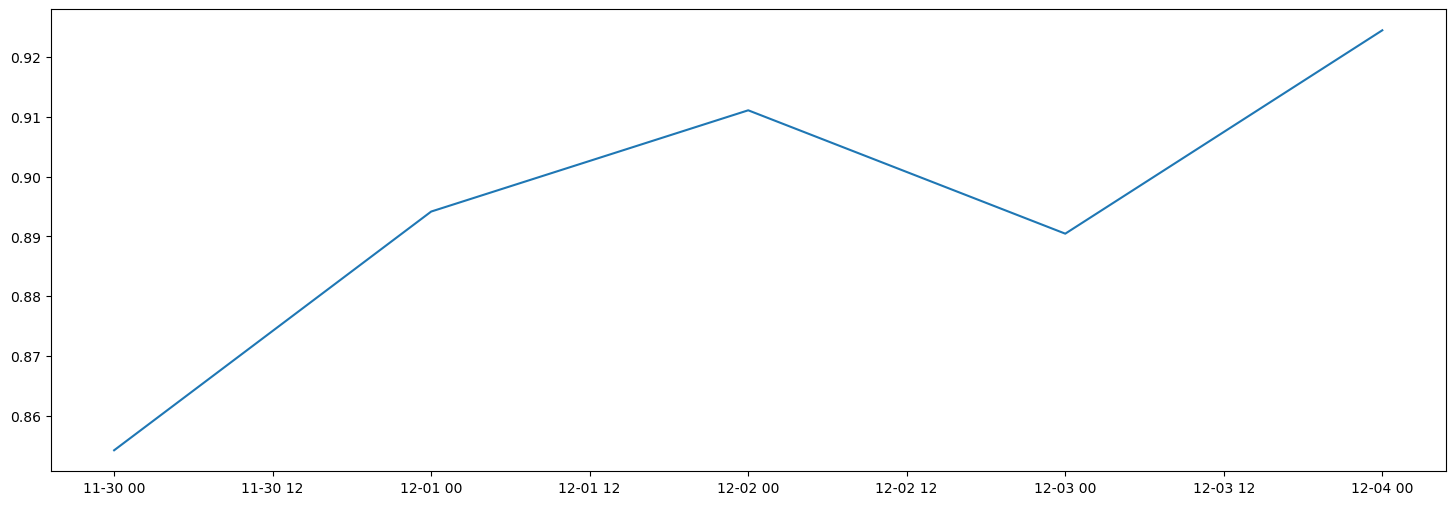

In [224]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(np.sort(data['date'].dt.date.unique()), time_series)

From the plot, we notice a couple of things:
* Test has constantly been worse than control and there is relatively little variance across days. That probably means that we do have enough data, but there was some bias in the experiment set up.
* On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to capture weekly patterns, 2 weeks would be much better.  

## Q3: Design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

##### Solution: 
Hypothesis:
If the sample is randomly selected, then there should be no siginicant relationship between features and experiment/control group.

In other words, for the categorical variables, the p-value of Chi-square test is not significant, and for the numeric variables, the p-values of t-test is not siginicant either. Thus, we can say that samples are selected randomly under the features.

This quick check solution can output the features with their p-values which show significant/insignificant relation with experiment/control group. If the p-value is lower than 0.05, we should be aware of the potential risk of selection bias.

In [225]:
data_1 = data.drop(['date', 'conversion'], axis = 1)

In [226]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401539 entries, 1 to 453320
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           401539 non-null  int64  
 1   source            401539 non-null  object 
 2   device            401539 non-null  object 
 3   browser_language  401539 non-null  object 
 4   ads_channel       160984 non-null  object 
 5   browser           401539 non-null  object 
 6   test              401539 non-null  int64  
 7   sex               401085 non-null  object 
 8   age               401085 non-null  float64
 9   country           401085 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 33.7+ MB


In [227]:
columns_category = data_1.select_dtypes(include='object').columns.tolist()
columns_numerical = data_1.select_dtypes(include='float64').columns.tolist()

In [228]:
detect_result = pd.DataFrame(columns = ['Feature', 'p_value'])

In [229]:
from scipy.stats import chi2_contingency 
import researchpy as rp

feature = []
p_value = []

for i in columns_category:
    feature.append(i)
    table = pd.pivot_table(data_1, values='user_id', index=[i],
                    columns=['test'], aggfunc=lambda x: len(x.unique())).reset_index()

    list_1 = []
    list_all = []

    for i in range(table.shape[0]):
        list_1.append(table.iloc[i,1])
        list_1.append(table.iloc[i,2])
        list_all.append(list_1)
        list_1 = []
    
    stat, p, dof, expected = chi2_contingency(list_all)
    p_value.append(p)

    
for i in columns_numerical:
    des, res = rp.ttest(group1= data_1['age'][(data['test'] == 0)], group1_name= "Control",
         group2= data['age'][data['test'] == 1], group2_name= "Experiment")
    feature.append(i)
    p_value.append(res.iloc[3,1])

detect_result['Feature'] = feature
detect_result['p_value'] = p_value
detect_result = detect_result.sort_values('p_value')
detect_result

,Feature,p_value
6,country,0.000000
4,browser,0.020616
7,age,0.192700
1,device,0.264464
0,source,0.340499
2,browser_language,0.539991
3,ads_channel,0.668999
5,sex,0.681590


According to the output table above, marketing team should pay attention to the selection bias caused by country which is the top risky feature in the table.

In [230]:
a = data.groupby(['country','test'])[['conversion']].mean().unstack()
b = data.groupby('country')[['test']].mean()
df = pd.concat([a,b], axis = 1)

temp1 = data[data['test'] == 0]
temp2 = data[data['test'] == 1]

a = []; b = []; c = []; d = []
for i, j in temp1.groupby('country')['conversion']:
    a.append(i)
    b.append(j)
for i, j in temp2.groupby('country')['conversion']:
    c.append(i)
    d.append(j)
    
p_value = []
for i in np.arange(16):
    p_value.append(sc.stats.ttest_ind(b[i], d[i], equal_var = False, axis = 0)[1])    
    
df = pd.concat([df, pd.DataFrame(p_value, index = a)], axis = 1)    
df.columns = ['mean in control', 'mean in test', '%samples in test group', 'p_value']
df

,mean in control,mean in test,%samples in test group,p_value
Argentina,0.015071,0.013725,0.799799,0.335147
Bolivia,0.049369,0.047901,0.501079,0.718885
Chile,0.048107,0.051295,0.500785,0.302848
Colombia,0.052089,0.050571,0.498927,0.423719
Costa Rica,0.052256,0.054738,0.498964,0.687876
Ecuador,0.049154,0.048988,0.494432,0.961512
El Salvador,0.053554,0.047947,0.497492,0.248127
Guatemala,0.050643,0.048647,0.496066,0.572107
Honduras,0.050906,0.047540,0.491013,0.471463
Mexico,0.049495,0.051186,0.500257,0.165544


The test/control ratio of most countries is around 50/50. Only Argentina and Uruguay have 80% test and 20% control.

After we control for country, the test clearly appears non significant. Not a great success given that the goal was to improve conversion rate, but at least we know that a localized translation didn’t make things worse!